## DESAFIO CAS 2024

#### Importando bibliotecas

In [24]:
pip install scikit-gstat
pip install plotly
pip install geopy

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 708.5/708.5 kB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 9.0 MB/s eta 0:00:00
     -------------------------------------- 315.4/315.4 kB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 28.1/28.1 MB 7.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from skgstat import OrdinaryKriging
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


##### Tratamento inicial dos dados

In [3]:
base = pd.read_excel(r'Competição de Casos CAS + Swiss Re 2024 - Dados.xlsx', skiprows = 3, sheet_name='Apólices e Eventos')
depara_loc = pd.read_excel(r'Competição de Casos CAS + Swiss Re 2024 - Dados.xlsx', sheet_name='Locais Segurados')

### Base de geometrias do mundo
base_geo_mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15184\2155742153.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  base_geo_mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [4]:
base.head()

,ID,Ano da Apólice,Importância Segurada,Prêmio,ID Evento,Mês,Duração da Enchente (dias),Severidade da Enchente (escala 1-5),Precipitação (mm),Aumento do Nível da Água (m),Valor do Sinistro
0,loc001,2014,87223100,659145,NaN,NaN,NaN,NaN,NaN,NaN,0
1,loc001,2015,89011170,672330,NaN,NaN,NaN,NaN,NaN,NaN,0
2,loc001,2016,90444250,685780,NaN,NaN,NaN,NaN,NaN,NaN,0
3,loc001,2017,92596820,699500,NaN,NaN,NaN,NaN,NaN,NaN,0
4,loc001,2018,94439500,713490,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
depara_loc.head()

,ID,Latitude,Longitude
0,loc001,-33.9069,18.4163
1,loc002,40.4870,-3.7134
2,loc003,9.0579,7.4951
3,loc004,44.6694,11.2376
4,loc005,14.5524,121.0265


In [6]:
base = base.merge(depara_loc, left_on= 'ID', right_on='ID')

In [7]:
base.head()

,ID,Ano da Apólice,Importância Segurada,Prêmio,ID Evento,Mês,Duração da Enchente (dias),Severidade da Enchente (escala 1-5),Precipitação (mm),Aumento do Nível da Água (m),Valor do Sinistro,Latitude,Longitude
0,loc001,2014,87223100,659145,NaN,NaN,NaN,NaN,NaN,NaN,0,-33.9069,18.4163
1,loc001,2015,89011170,672330,NaN,NaN,NaN,NaN,NaN,NaN,0,-33.9069,18.4163
2,loc001,2016,90444250,685780,NaN,NaN,NaN,NaN,NaN,NaN,0,-33.9069,18.4163
3,loc001,2017,92596820,699500,NaN,NaN,NaN,NaN,NaN,NaN,0,-33.9069,18.4163
4,loc001,2018,94439500,713490,NaN,NaN,NaN,NaN,NaN,NaN,0,-33.9069,18.4163


In [8]:
base.describe()

,Ano da Apólice,Importância Segurada,Prêmio,ID Evento,Mês,Duração da Enchente (dias),Severidade da Enchente (escala 1-5),Precipitação (mm),Aumento do Nível da Água (m),Valor do Sinistro,Latitude,Longitude
count,1580.000000,1.580000e+03,1.580000e+03,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,1.580000e+03,1580.000000,1580.000000
mean,2018.500000,2.162184e+08,1.345975e+06,30.324468,6.952128,6.356383,3.574468,189.521277,2.472340,6.764557e+04,7.084923,22.769320
std,2.873191,2.501903e+08,1.748856e+06,17.171860,3.643593,1.729150,0.942058,47.642660,0.803589,2.801626e+05,32.044059,85.941555
min,2014.000000,-1.098238e+07,5.098400e+04,1.000000,1.000000,4.000000,2.000000,100.000000,1.200000,0.000000e+00,-41.294700,-123.130700
25%,2016.000000,5.408438e+07,3.397225e+05,16.000000,3.000000,5.000000,3.000000,150.000000,1.900000,0.000000e+00,-27.499800,-58.413300
50%,2018.500000,1.212808e+08,7.681900e+05,30.000000,7.000000,6.000000,4.000000,190.000000,2.400000,0.000000e+00,11.808000,11.915950
75%,2021.000000,2.888756e+08,1.678260e+06,45.000000,11.000000,8.000000,4.000000,220.000000,2.900000,0.000000e+00,39.678800,112.642700
max,2023.000000,1.820999e+09,1.686091e+07,60.000000,12.000000,10.000000,5.000000,310.000000,4.500000,4.280000e+06,52.523300,174.883300


In [37]:
gdf = gpd.GeoDataFrame(base, geometry = [Point(xy) for xy in zip(base['Longitude'], base['Latitude'])])

<AxesSubplot: >

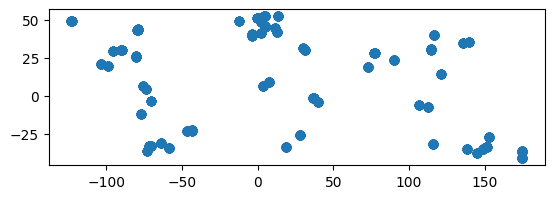

In [54]:
gdf.plot()

<AxesSubplot: >

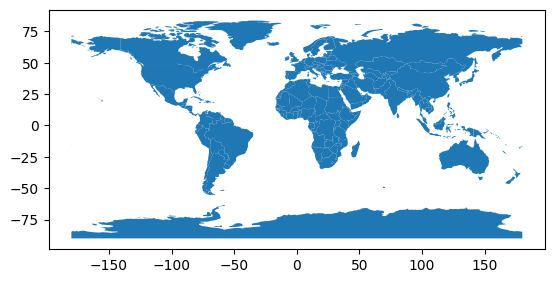

In [38]:
base_geo_mundo.plot()

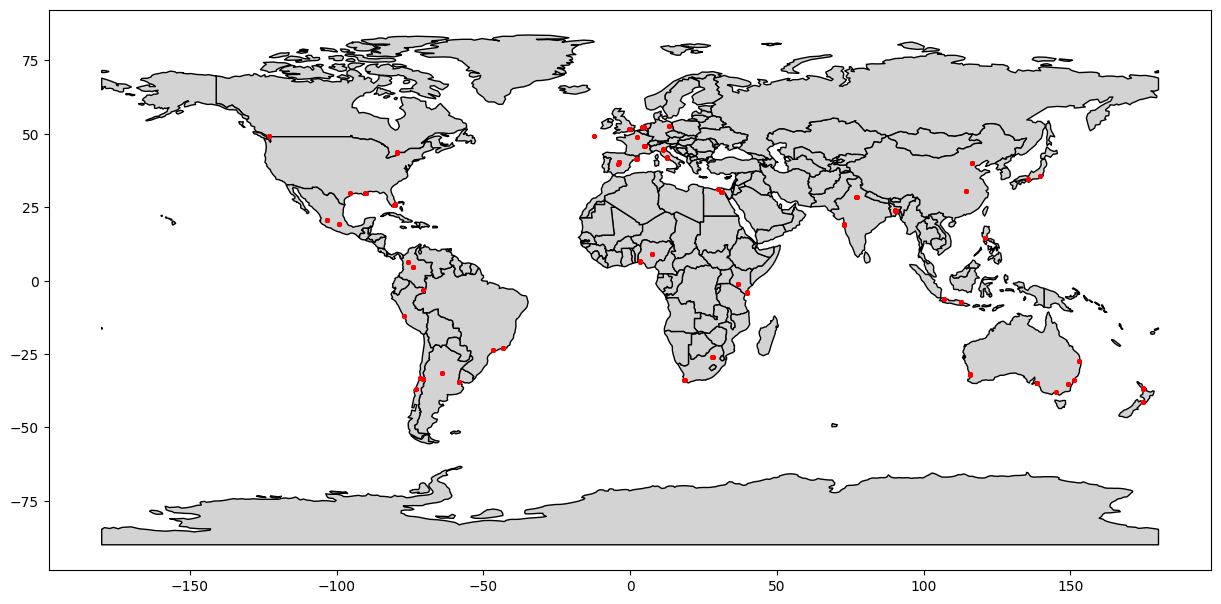

In [39]:
# Plotar a base de geometrias
ax = base_geo_mundo.plot(color='lightgray', edgecolor='black', figsize=(15, 10))

# Plotar os pontos da base sobre a geometria
gdf.plot(ax=ax, color='red', marker='o', markersize=5)

# Mostrar o gráfico
plt.show()


In [52]:
# Converter a geometria do mundo para GeoJSON
geojson_mundo = base_geo_mundo.to_json()

# Criar o mapa com a geometria e os pontos
fig = px.choropleth_mapbox(
    gdf,
    geojson=geojson_mundo,  # Geometria do mundo
    locations=gdf.index,  # Index dos pontos para plote
    color_discrete_sequence=["lightgray"],  # Cor para as geometrias
    mapbox_style="carto-positron",  # Estilo do mapa
    zoom=1,  # Zoom inicial
    center={"lat": 0, "lon": 0},  # Centro do mapa
)

# Adicionar os pontos no mapa
fig.add_scattermapbox(
    lat=gdf.geometry.y,  # Latitude dos pontos
    lon=gdf.geometry.x,  # Longitude dos pontos
    mode='markers',
    marker=go.scattermapbox.Marker(size=10000, color='red', opacity = 1),
    name='Pontos',
    text = gdf['ID'],
    hoverinfo = 'text'
)

# Mostrar o mapa interativo
fig.show()

In [55]:
base[base['ID'] == 'loc117'] ### TA ZUADO ESSA PORRA AQUI

,ID,Ano da Apólice,Importância Segurada,Prêmio,ID Evento,Mês,Duração da Enchente (dias),Severidade da Enchente (escala 1-5),Precipitação (mm),Aumento do Nível da Água (m),Valor do Sinistro,Latitude,Longitude
910,loc117,2014,45520200,421972,NaN,NaN,NaN,NaN,NaN,NaN,0,49.1666,-12.31378
911,loc117,2015,46280390,430410,NaN,NaN,NaN,NaN,NaN,NaN,0,49.1666,-12.31378
912,loc117,2016,47280050,439020,NaN,NaN,NaN,NaN,NaN,NaN,0,49.1666,-12.31378
913,loc117,2017,48410040,447800,NaN,NaN,NaN,NaN,NaN,NaN,0,49.1666,-12.31378
914,loc117,2018,49378240,456760,NaN,NaN,NaN,NaN,NaN,NaN,0,49.1666,-12.31378
915,loc117,2019,50588010,465900,31.0,7.0,5.0,3.0,210.0,2.7,200000,49.1666,-12.31378
916,loc117,2020,51503650,475220,NaN,NaN,NaN,NaN,NaN,NaN,0,49.1666,-12.31378
917,loc117,2021,52636730,484720,NaN,NaN,NaN,NaN,NaN,NaN,0,49.1666,-12.31378
918,loc117,2022,53715780,494410,NaN,NaN,NaN,NaN,NaN,NaN,0,49.1666,-12.31378
919,loc117,2023,54645060,504300,NaN,NaN,NaN,NaN,NaN,NaN,0,49.1666,-12.31378


#### Trazendo as cidades e países para a base

In [78]:
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [74]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [9]:
base_cidades = pd.read_csv(r'C:\Users\Lenovo\Downloads/World_Cities_Location_table.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3798, saw 2


In [ ]:
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Inicializar o geocodificador (Nominatim via OpenStreetMap)
geolocator = Nominatim(user_agent="geoapiExercises")

# Limitar a taxa de solicitações (evitar bloqueios)
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# Função para realizar a geocodificação reversa usando a geometria
def obter_cidade_pais_geometry(geometry):
    try:
        # Extrair coordenadas da geometria
        coords = (geometry.y, geometry.x)  # (latitude, longitude)
        location = geocode(coords, language='en')
        if location:
            address = location.raw.get('address', {})
            cidade = address.get('city', '') or address.get('town', '') or address.get('village', '')  # Tentar diferentes níveis administrativos
            pais = address.get('country', '')
            return pd.Series([cidade, pais])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

# Aplicar a função ao GeoDataFrame
gdf[['cidade', 'pais']] = gdf['geometry'].apply(obter_cidade_pais_geometry)

# Verificar os resultados
print(gdf[['cidade', 'pais']].head())


RateLimiter caught an error, retrying (0/2 tries). Called with (*((-33.9069, 18.4163),), **{'language': 'en'}).
Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopy\geocoders\base.py", line 368, in _call_geocoder
    result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopy\adapters.py", line 472, in get_json
    resp = self._request(url, timeout=timeout, headers=headers)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopy\adapters.py", line 500, in _request
    raise AdapterHTTPError(
geopy.adapters.AdapterHTTPError: Non-successful status code 403

The above exception was the direct cause of the following exception:

Traceback (most recent